### Project
Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

Download and save the dataset to your repository.

Describe the data set in your notebook.

Describe what a t-test is, how it works, and what the assumptions are.

Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("PlantGrowth.csv")
#df
df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [17]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


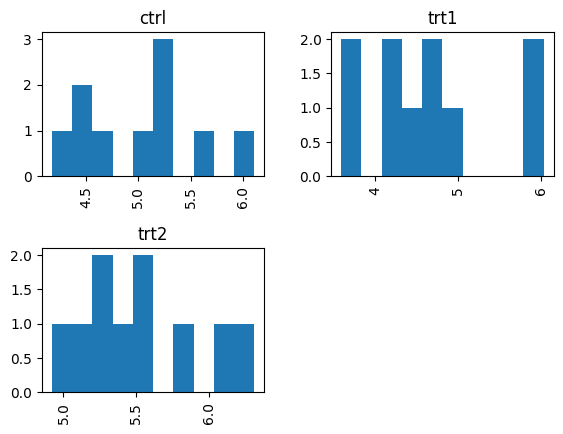

In [28]:
# visualise data by groups  ref: https://www.statology.org/pandas-histogram-by-group/
df['weight'].hist(by=df['group'])
plt.show()